In [4]:
!git clone https://github.com/Gpar377/Titanic-Dataset---EDA-and-Model-Building

fatal: destination path 'Titanic-Dataset---EDA-and-Model-Building' already exists and is not an empty directory.


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Changed pl to plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

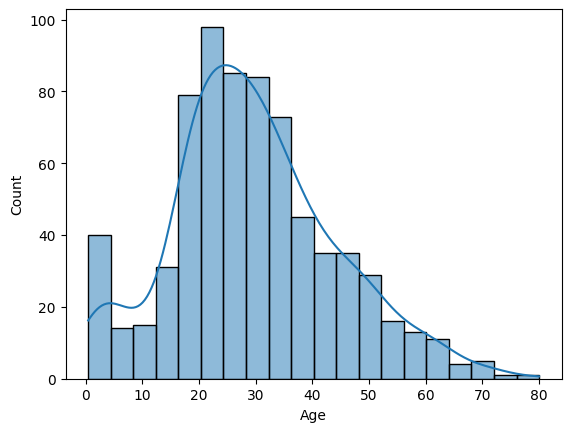

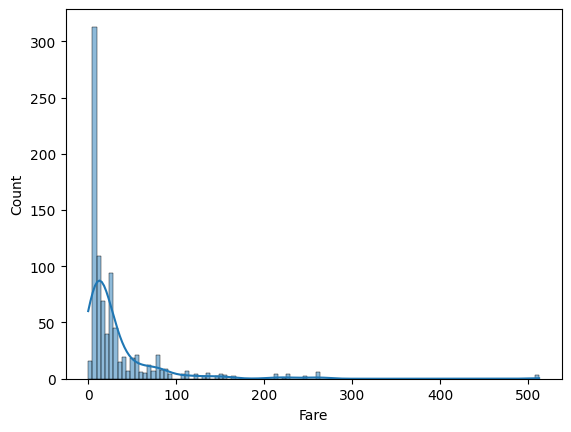

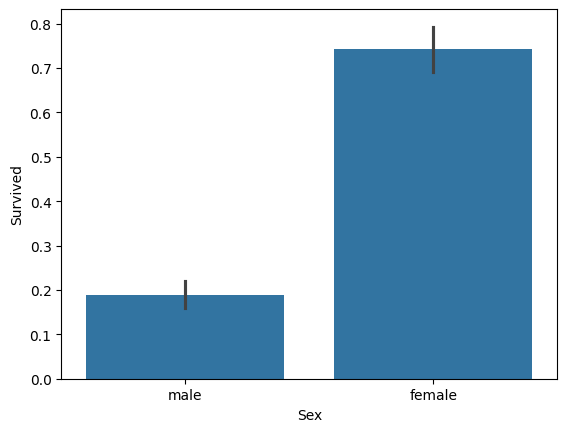

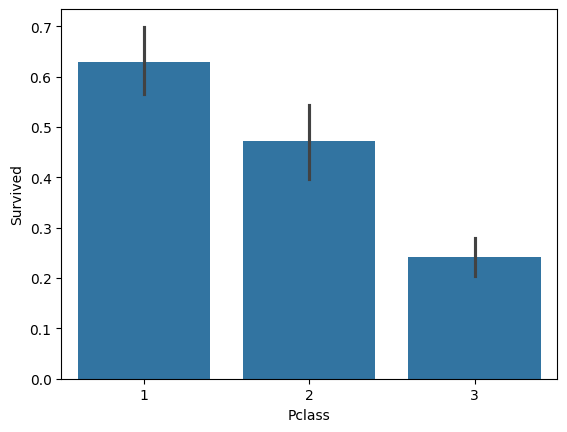

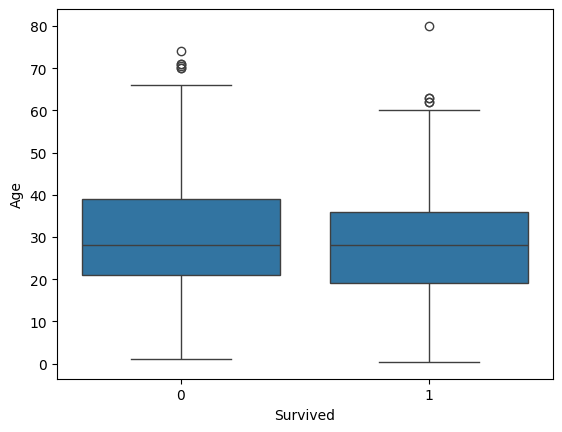

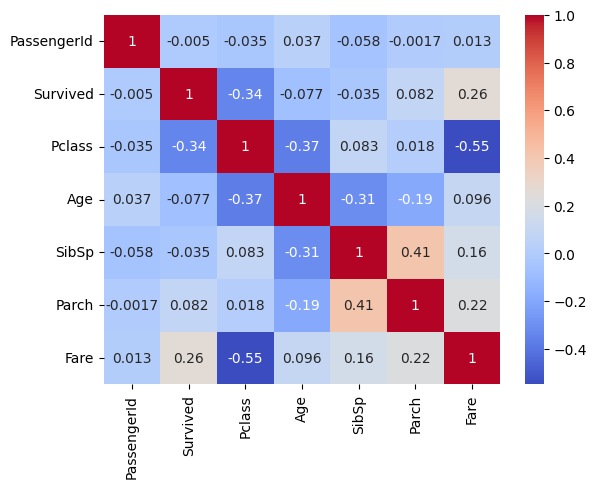

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Random Forest Accuracy: 0.8435754189944135
CV Average Score: 0.7901136149645346


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [13]:
# Load dataset
df = pd.read_csv('/content/Titanic-Dataset---EDA-and-Model-Building/titanic/train.csv')
# View first few rows
print(df.head())
# Summary statistics
print(df.describe())
# Data types and missing values
print(df.info())
# Check for missing values
print(df.isnull().sum())
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())
sns.histplot(df['Age'].dropna(), kde=True)
plt.show()
sns.histplot(df['Fare'], kde=True)
plt.show()
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'] = df['Cabin'].notnull().astype(int)  # 1 if Cabin is available, else 0
# Encode 'Sex' and 'Embarked'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
#Drop the 'Name' and 'Ticket' columns
df = df.drop(columns=['Name','Ticket']) # Drop the 'Name' and 'Ticket' columns

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
# Define the target and features
X = df.drop(columns=['Survived'])
y = df['Survived']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# Predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
cv_scores = cross_val_score(model, X, y, cv=5)
print("CV Average Score:", cv_scores.mean())
# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)